In [1]:
import numpy as np
import numpy.random as npr
import numpy.linalg as npl
import scipy as sp
import scipy.integrate as spi
import scipy.linalg as spl
import matplotlib.pyplot as plt
import pandas as pd
import ujson

In [2]:
def solve_equation(W, P_init):
    return lambda t: spl.expm(W * t) @ P_init

In [3]:
def activity(W, P_init, max_time):
    Pt = solve_equation(W, P_init)
    return spi.quad(lambda t: instant_activity(W, Pt(t)), 0, max_time)[0]

def instant_activity(W, P_at_t):
    N = len(P_at_t)
    tmp = 0
    for i in range(N):
        for j in range(N):
            if i != j:
                tmp += P_at_t[i] * W[j, i]
    return tmp

# LHS
$$
LHS = \frac{1}{2}\int_{0}^{\tau}dt\,\frac{\sqrt{\mathcal{A}(t)}}{t}
$$

In [4]:
def fisher(W, P_init, tau):
    tmp = spi.quad(lambda t: np.sqrt(1 / t**2 * activity(W, P_init, t)), 0, tau)[0]
    return 0.5 * tmp

# RHS
$$
\mathcal{L}_P(P(\nu, 0), P(\nu, \tau)) \equiv \arccos [\operatorname{Bhat}(P(\nu, 0), P(\nu, \tau))]
$$
$$
\operatorname{Bhat}\left(p_1(x), p_2(x)\right) \equiv \sum_x \sqrt{p_1(x) p_2(x)}
$$

In [5]:
def Bhat(P1, P2):
    N = len(P1)
    tmp = 0.0
    for i in range(N):
        tmp += np.sqrt(P1[i]) * np.sqrt(P2[i])
    return tmp

def L_P(P_init, P_end):
    return np.arccos(Bhat(P_init, P_end))

# Calculations

In [12]:
W = np.array([[-1, 1], [1, -1]])
Pss = np.array([0.5, 0.5])
P_init = [1, 0]
# P_init = [0.6, 0.4]
Pt = solve_equation(W, P_init)

In [16]:
# time_slot = np.linspace(0.001, 2, num=50)
time_slot = np.arange(0.01, 2, 0.01)
resultt = []
for mt in time_slot:
    fisher_val = fisher(W, P_init, mt)
    
    P_end = Pt(mt)
    L_P(P_init, P_end)
    LP_val = L_P(P_init, P_end)
    resultt.append((fisher_val, LP_val))

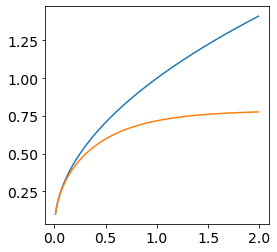

In [18]:
plt.rcParams["figure.figsize"] = (4, 4)
plt.rcParams["font.size"] = 14
xvals = np.array(resultt)[:, 0]
yvals = np.array(resultt)[:, 1]
plt.plot(time_slot, xvals)
plt.plot(time_slot, yvals)

In [25]:
tmp_m = np.array([time_slot, xvals, yvals]).T
tmp_m = np.vstack([[0,0,0],tmp_m])
np.savetxt(f'/<output_folder>/CSL_Pinit_{P_init}.txt', np.array(tmp_m))